In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import OneHotEncoder as OHE

pd.set_option('display.max_columns',100)


filePath = 'C:/Users/Rob/Documents/Python Scripts/DataScience/housePrices-GettingStarted/'
train = pd.read_csv(filePath + 'train.csv')
test = pd.read_csv(filePath + 'test.csv')

houseData = train.append(test, ignore_index = True,sort = False)


print('Full data size (rows, cols) = '+ str(houseData.shape))


Full data size (rows, cols) = (2919, 81)


In [235]:
# explore the data

print(houseData.columns)
print(houseData.shape)



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [236]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [237]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [238]:
houseData.MSSubClass.value_counts()

# check number of values in each categorical type
# We're doing categoricals first!
objHd = houseData.loc[:,houseData.dtypes == 'object']
objTrain = objHd.loc[0:len(train),:]

# this was to check if the sets were balanced
a = [objHd[x].value_counts(dropna = False) for x in objHd.columns]
b = [objTrain[x].value_counts(dropna = False) for x in objHd.columns]
for x in range(len(a)):
    print(a[x])
    print(b[x])
    print('\n')

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64
RL         1151
RM          218
FV           65
RH           17
C (all)      10
Name: MSZoning, dtype: int64


Pave    2907
Grvl      12
Name: Street, dtype: int64
Pave    1455
Grvl       6
Name: Street, dtype: int64


NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
NaN     1370
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Reg    926
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Lvl    1312
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1460
NoSeWa       1
Name: Utilities, dtype: int64


Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3      

Name: MiscFeature, dtype: int64
NaN     1407
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64
WD       1268
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
Normal     1199
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64




In [239]:
# First check for missing values
miss = pd.isna(houseData).sum()
print(miss[miss != 0])

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [240]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [241]:
# replace missing values

def cleanNA(df):
    # gets 'NA'
    NaCols = ['MSZoning',
              'Exterior1st',
              'Exterior2nd',
              'BsmtQual',
              'BsmtCond',
              'BsmtExposure',
              'BsmtFinType1', 
              'BsmtFinType2',
              'Electrical', 
              'KitchenQual',
              'Functional',
              'FireplaceQu',
              'GarageType',
              'GarageFinish', 
              'GarageQual',
              'GarageCond', 
              'SaleType']
    df.loc[:,NaCols] = df.loc[:,NaCols].fillna('Na')

    # these get filled with most popular
    df.loc[:,'Utilities'].fillna('AllPub', inplace = True)
    df.loc[:,'MasVnrType'].fillna('None', inplace = True)

    # now numerical

    # gets 0
    numNAcols = ['LotFrontage',
                'MasVnrArea',
                'BsmtFinSF1',       
                'BsmtFinSF2',       
                'BsmtUnfSF',        
                'TotalBsmtSF',       
                'BsmtFullBath',
                'BsmtHalfBath',
                'GarageArea',
                'GarageCars']
    df.loc[:,numNAcols] = df.loc[:,numNAcols].fillna(0)

    # garage year built is either non existant or unknown
    # set to house yaer built regardless
    garYear = df.GarageYrBlt.isna()
    df.loc[garYear, 'GarageYrBlt'] = df.loc[garYear,'YearBuilt']
    
    #Gather those with extra features like Alley,
    #pools, fences and misc features
    sparseFeats = ['Alley','PoolQC','Fence','MiscFeature']
    newRareFeats = df[sparseFeats].isna().sum(1)

    # convert to binary
    rareFeats = newRareFeats != len(sparseFeats)

    # now see if we are better off combining these
    print('Combining cols with large number of missing data leaves ' + 
    str(sum(rareFeats)) + ' with missing values!')

    # Add to housing data and remove the unnecessary columns
    df['rareFeats'] = rareFeats
    df.drop(sparseFeats + ['PoolArea'], axis = 1, inplace = True)
    return(df)


train = cleanNA(train)
test = cleanNA(test)
houseData = cleanNA(houseData)

Combining cols with large number of missing data leaves 383 with missing values!
Combining cols with large number of missing data leaves 412 with missing values!
Combining cols with large number of missing data leaves 795 with missing values!


In [242]:
# look at how the area contributes to price
nbhPrice = houseData[['Neighborhood','SalePrice']].groupby('Neighborhood').agg(np.mean)

print(nbhPrice.sort_values('SalePrice'))

dict(zip(list(nbhPrice.sort_values('SalePrice').index),
    [0]*12 + [1]*10 + [2]*3))

                  SalePrice
Neighborhood               
MeadowV        98576.470588
IDOTRR        100123.783784
BrDale        104493.750000
BrkSide       124834.051724
Edwards       128219.700000
OldTown       128225.300885
Sawyer        136793.135135
Blueste       137500.000000
SWISU         142591.360000
NPkVill       142694.444444
NAmes         145847.080000
Mitchel       156270.122449
SawyerW       186555.796610
NWAmes        189050.068493
Gilbert       192854.506329
Blmngtn       194870.882353
CollgCr       197965.773333
Crawfor       210624.725490
ClearCr       212565.428571
Somerst       225379.837209
Veenker       238772.727273
Timber        242247.447368
StoneBr       310499.000000
NridgHt       316270.623377
NoRidge       335295.317073


{'MeadowV': 0,
 'IDOTRR': 0,
 'BrDale': 0,
 'BrkSide': 0,
 'Edwards': 0,
 'OldTown': 0,
 'Sawyer': 0,
 'Blueste': 0,
 'SWISU': 0,
 'NPkVill': 0,
 'NAmes': 0,
 'Mitchel': 0,
 'SawyerW': 1,
 'NWAmes': 1,
 'Gilbert': 1,
 'Blmngtn': 1,
 'CollgCr': 1,
 'Crawfor': 1,
 'ClearCr': 1,
 'Somerst': 1,
 'Veenker': 1,
 'Timber': 1,
 'StoneBr': 2,
 'NridgHt': 2,
 'NoRidge': 2}

In [243]:
houseData.SaleCondition.value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [244]:
def ordinalMaker(df):
    # This is the ordinal data dicts
    qualScale = {'Ex':5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Na':0}
    zoningScale = {'A':1, 'C (all)':1, 'FV':1, 'I':1, 
                   'RL':0, 'RM':0, 'RH':0, 'RP':0, 'Na':0}
    street = {'Grvl': 1, 'Pave':0, 'Na':0}
    lndCtr = {'Lvl':0, 'HLS':1, 'Bnk':1, 'Low':1}
    slopeScale = {'Gtl':0, 'Mod':1, 'Sev':1}
    Uts = {'ELO':3, 'NoSeWa':2, 'NoSewr':1, 'AllPub':0}
    shp = {'Reg':0, 'IR1':1, 'IR2':1, 'IR3':1}
    bsmtLQ = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'Na':0}
    bsmtEx = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'Na':0}
    garFin = {'Fin':3, 'RFn':2, 'Unf':1, 'Na':0}
    
    # reusing the last section
    # labelling areas as low, medium and high price 
    # based on response variable so dodgey?
    nbhPrice = df[['Neighborhood','SalePrice']].groupby('Neighborhood').agg(np.mean)
    neighPriceLevel = dict(zip(list(nbhPrice.sort_values('SalePrice').index),
                        [0]*12 + [1]*10 + [2]*3))
    
    cond = {'Artery':'Street',
            'Feedr':'Street',
            'Norm': 'Norm',
            'RRNn': 'Rail',
            'RRAn': 'Rail',
            'PosN': 'Park',
            'PosA': 'Park',
            'RRNe': 'Rail',
            'RRAe': 'Rail'
           }
    
    HStyle = {'1Story': 1, 
              '1.5Fin':1.5,
             '1.5Unf':1.25,
             '2Story':2,
             '2.5Fin':2.5,
             '2.5Unf':2.25,
             'SFoyer':1,
             'SLvl':1.5}
    
    RoofStyle = {'Gambrel': 'OtherRoof','Mansard':'OtherRoof','Shed':'OtherRoof'}
    
    Ext = ['CemntBd','BrkFace','WdShing', 'AsbShng',
           'Stucco','BrkComm','CBlock','Stone','AsphShn'
           'ImStucc','Na']
    brick = ['BrkCmn', 'BrkFace']
    
    found = ['Slab','Stone', 'Wood']
    
    garType = {'2Types':2, 'Attchd':1, 'Basment':1, 
              'BuiltIn':1, 'CarPort':1, 'Detchd':2,
              'Na':0}
    
    Paved = {'Y':0, 'P':1, 'N':1}
      
    

    # Action area here
    df['MSZoning'].replace(zoningScale, inplace = True)
    df['Street'].replace(street, inplace = True)
    df['LotShape'].replace(shp, inplace = True)
    df['LandContour'].replace(lndCtr, inplace = True)
    df['Utilities'].replace(Uts, regex = True, inplace = True)
    df['LandSlope'].replace(slopeScale, regex = True, inplace = True)
    df['Neighborhood'].replace(neighPriceLevel, inplace = True)
    df[['Condition1','Condition2']] = df[['Condition1','Condition2']].replace(cond)
    df['HouseStyle'].replace(HStyle, inplace = True)
    df['RoofStyle'].replace(RoofStyle, inplace = True)
    df['RoofMatl'] = df['RoofMatl'] == 'CompShg'
    df['Exterior1st'].replace(Ext,'ExtOther', inplace = True)
    df['Exterior2nd'].replace(Ext, 'ExtOther', inplace = True)
    df['MasVnrType'].replace(brick, 'brick', inplace = True)
    df['ExterCond'].replace(qualScale, inplace = True)
    df['ExterQual'].replace(qualScale, inplace = True)
    df['Foundation'].replace(found, 'FoundOther', inplace = True)
    df['BsmtQual'].replace(qualScale, inplace = True)
    df['BsmtCond'].replace(qualScale, inplace = True)
    df['BsmtExposure'].replace(bsmtEx, inplace = True)
    df['BsmtFinType1'].replace(bsmtLQ, inplace = True)
    df['BsmtFinType2'].replace(bsmtLQ, inplace = True)
    df['Heating'] = df['Heating'].str[:3] == 'GasW'
    df['HeatingQC'].replace(qualScale, inplace = True)
    df['CentralAir'] = df['CentralAir'] == 'Y'
    df['Electrical'] = df['Electrical'] == 'SBrkr'
    df['KitchenQual'].replace(qualScale, inplace = True)
    df['Functional'] = df['Functional'] == 'Typ'
    df['FireplaceQu'].replace(qualScale, inplace = True)
    df['GarageType'].replace(garType, inplace = True)
    df['GarageFinish'].replace(garFin, inplace = True)
    df['GarageQual'].replace(qualScale, inplace = True)
    df['GarageCond'].replace(qualScale, inplace = True)
    df['SaleType'] = df['SaleType'] == 'New'
    df['SaleCondition'] = df['SaleCondition'] == 'Normal'
    df['PavedDrive'].replace(Paved, inplace = True)
    
    return(df)


houseData = ordinalMaker(houseData)

    
    
    
    
    
    
    

In [245]:
# now dummify
def DummyTime(df):
    dumCols = ['LotConfig', 'Condition1', 'Condition2',
              'BldgType', 'RoofStyle', 'Exterior1st','Exterior2nd',
              'MasVnrType','Foundation']
    df = pd.get_dummies(df, prefix = dumCols, 
                  columns = dumCols,
                  drop_first = True)
    return df

houseData = DummyTime(houseData)

In [246]:
houseData.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,rareFeats,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Park,Condition1_Rail,Condition1_Street,Condition2_Park,Condition2_Rail,Condition2_Street,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_OtherRoof,Exterior1st_ExtOther,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_ExtOther,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Stone,MasVnrType_brick,Foundation_CBlock,Foundation_FoundOther,Foundation_PConc
0,1,60,0,65.0,8450,0,0,0,0,0,1,2.0,7,5,2003,2003,True,196.0,4,3,4,3,1,6,706.0,1,0.0,150.0,856.0,False,5,True,True,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,True,0,0,1,2003.0,...,0,0,0,0,2,2008,False,True,208500.0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2,20,0,80.0,9600,0,0,0,0,0,1,1.0,6,8,1976,1976,True,0.0,3,3,4,3,4,5,978.0,1,0.0,284.0,1262.0,False,5,True,True,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,True,1,3,1,1976.0,...,0,0,0,0,5,2007,False,True,181500.0,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,3,60,0,68.0,11250,0,1,0,0,0,1,2.0,7,5,2001,2002,True,162.0,4,3,4,3,2,6,486.0,1,0.0,434.0,920.0,False,5,True,True,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,True,1,3,1,2001.0,...,0,0,0,0,9,2008,False,True,223500.0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,4,70,0,60.0,9550,0,1,0,0,0,1,2.0,7,5,1915,1970,True,0.0,3,3,3,4,1,5,216.0,1,0.0,540.0,756.0,False,4,True,True,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,True,1,4,2,1998.0,...,272,0,0,0,2,2006,False,False,140000.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,0,84.0,14260,0,1,0,0,0,2,2.0,8,5,2000,2000,True,350.0,4,3,4,3,3,6,655.0,1,0.0,490.0,1145.0,False,5,True,True,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,True,1,3,1,2000.0,...,0,0,0,0,12,2008,False,True,250000.0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


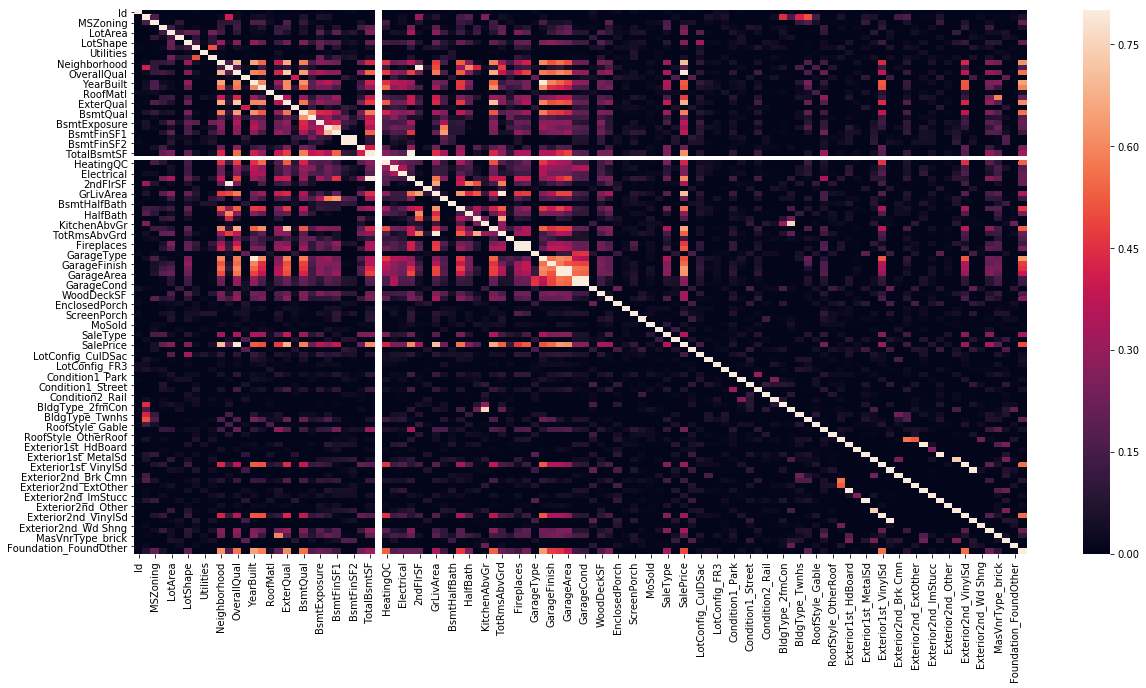

In [247]:
corr_matrix = houseData.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, vmax=0.8, vmin=0);

In [248]:
####################3
# Now split back into test and train
train = houseData.loc[~np.isnan(houseData.SalePrice),:]
test = houseData.loc[np.isnan(houseData.SalePrice),:]
testID = list(test.Id)
test = test.drop(['Id','SalePrice'], axis =1)

trainX = train.drop(['Id','SalePrice'], axis =1)
trainY = train.SalePrice

In [249]:
#### modelling time ######

ranForest = RFR( n_estimators = 100)

model = ranForest.fit(trainX, trainY)


tmp = model.predict(test)




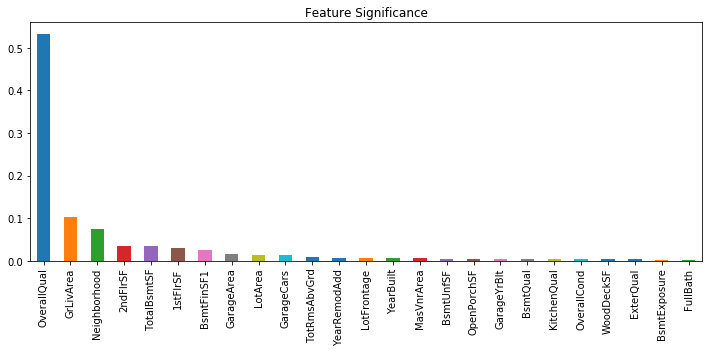

In [253]:
coef = pd.Series(model.feature_importances_, index = trainX.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [250]:

result = pd.DataFrame({'Id':testID,
                       'SalePrice':tmp})


In [252]:
result.to_csv('Submission2.csv', index = False)